# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and cleaning

In [126]:
# Loading dataset
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
predict = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

#Let's Make copy of the original datasets so we do not hamper the original datasets.

In [127]:
train_original = train.copy()
predict_original = predict.copy()

In [128]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [129]:
predict.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


## Data Cleaning - Checking and working with missing value

# Train--data cleaning

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [131]:
# First drop irrelevant column: loan ID
train = train.drop(columns=['Loan_ID'])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Method 1: KNN

In [132]:
from sklearn.impute import KNNImputer

In [133]:
# encode all non numerical values

# using one hot encoding for Education and Property_Area
train = pd.get_dummies(train,columns=['Education','Property_Area'], prefix = ['Education','Property_Area'])

# using label encoding for gender,married,self_employed and loan_status
train['Gender'] = train['Gender'].astype('category').cat.codes
train['Married'] = train['Married'].astype('category').cat.codes
train['Self_Employed'] = train['Self_Employed'].astype('category').cat.codes
train['Loan_Status'] = train['Loan_Status'].astype('category').cat.codes

 # replace 3+ with 3 and change it to float
train['Dependents'] = train['Dependents'].replace('3+', 3).astype(float)        

train
# 0 for female, 1 for male
# 0 for no, 1 for yes

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,5849,0.0,NaN,360.0,1.0,1,True,False,False,False,True
1,1,1,1.0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,True,False,False
2,1,1,0.0,1,3000,0.0,66.0,360.0,1.0,1,True,False,False,False,True
3,1,1,0.0,0,2583,2358.0,120.0,360.0,1.0,1,False,True,False,False,True
4,1,0,0.0,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,False
610,1,1,3.0,0,4106,0.0,40.0,180.0,1.0,1,True,False,True,False,False
611,1,1,1.0,0,8072,240.0,253.0,360.0,1.0,1,True,False,False,False,True
612,1,1,2.0,0,7583,0.0,187.0,360.0,1.0,1,True,False,False,False,True


In [134]:
imputer  = KNNImputer(n_neighbors = 3)
train = pd.DataFrame(imputer.fit_transform(train),columns=train.columns)
train

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,0.0,5849.0,0.0,138.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
610,1.0,1.0,3.0,0.0,4106.0,0.0,40.0,180.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
611,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
612,1.0,1.0,2.0,0.0,7583.0,0.0,187.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Dependents               614 non-null    float64
 3   Self_Employed            614 non-null    float64
 4   ApplicantIncome          614 non-null    float64
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    float64
 10  Education_Graduate       614 non-null    float64
 11  Education_Not Graduate   614 non-null    float64
 12  Property_Area_Rural      614 non-null    float64
 13  Property_Area_Semiurban  614 non-null    float64
 14  Property_Area_Urban      6

# Method 2: regression

In [78]:
# from sklearn.linear_model import LinearRegression

# def fill_missing_with_regression(df,target_column):
#     train_data = df[df[target_column].notnull()]
#     predict_data = df[df[target_column].isnull()]
#     if predict_data.empty:
#         return df
    
#     complete_columns = df.columns[df.isnull().sum() == 0].tolist()
#     if target_column in complete_columns:
#         complete_columns.remove(target_column)
    
#     X_train = train_data[complete_columns]
#     y_train = train_data[target_column]
#     X_predict = predict_data[complete_columns]

#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     df.loc[df[target_column].isnull(), target_column] = model.predict(X_predict)
    
#     return df


# missing_columns = train.columns[train.isnull().any()].tolist()

# # Apply regression to fill in missing values for each column with missing data
# for column in missing_columns:
#     train = fill_missing_with_regression(train, column)


# train.head()


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Dependents               614 non-null    float64
 3   Self_Employed            614 non-null    float64
 4   ApplicantIncome          614 non-null    float64
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    float64
 10  Education_Graduate       614 non-null    float64
 11  Education_Not Graduate   614 non-null    float64
 12  Property_Area_Rural      614 non-null    float64
 13  Property_Area_Semiurban  614 non-null    float64
 14  Property_Area_Urban      6

# Predict--data cleaning

In [137]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [138]:
# First drop irrelevant column: loan ID
predict = predict.drop(columns=['Loan_ID'])
predict.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [139]:
from sklearn.impute import KNNImputer

In [140]:
# encode all non numerical values

# using one hot encoding for Education and Property_Area
predict = pd.get_dummies(predict,columns=['Education','Property_Area'], prefix = ['Education','Property_Area'])

# using label encoding for gender,married,self_employed and loan_status
predict['Gender'] = predict['Gender'].astype('category').cat.codes
predict['Married'] = predict['Married'].astype('category').cat.codes
predict['Self_Employed'] = predict['Self_Employed'].astype('category').cat.codes
 # replace 3+ with 3 and change it to float
predict['Dependents'] = predict['Dependents'].replace('3+', 3).astype(float)        

predict
# 0 for female, 1 for male
# 0 for no, 1 for yes

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0.0,0,5720,0,110.0,360.0,1.0,True,False,False,False,True
1,1,1,1.0,0,3076,1500,126.0,360.0,1.0,True,False,False,False,True
2,1,1,2.0,0,5000,1800,208.0,360.0,1.0,True,False,False,False,True
3,1,1,2.0,0,2340,2546,100.0,360.0,NaN,True,False,False,False,True
4,1,0,0.0,0,3276,0,78.0,360.0,1.0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3.0,1,4009,1777,113.0,360.0,1.0,False,True,False,False,True
363,1,1,0.0,0,4158,709,115.0,360.0,1.0,True,False,False,False,True
364,1,0,0.0,0,3250,1993,126.0,360.0,NaN,True,False,False,True,False
365,1,1,0.0,0,5000,2393,158.0,360.0,1.0,True,False,True,False,False


In [141]:
imputer  = KNNImputer(n_neighbors = 3)
predict = pd.DataFrame(imputer.fit_transform(predict),columns=predict.columns)
predict

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1.0,0.0,0.0,5720.0,0.0,110.0,360.0,1.000000,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,3076.0,1500.0,126.0,360.0,1.000000,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,2.0,0.0,5000.0,1800.0,208.0,360.0,1.000000,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,2.0,0.0,2340.0,2546.0,100.0,360.0,0.666667,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,3276.0,0.0,78.0,360.0,1.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,3.0,1.0,4009.0,1777.0,113.0,360.0,1.000000,0.0,1.0,0.0,0.0,1.0
363,1.0,1.0,0.0,0.0,4158.0,709.0,115.0,360.0,1.000000,1.0,0.0,0.0,0.0,1.0
364,1.0,0.0,0.0,0.0,3250.0,1993.0,126.0,360.0,0.666667,1.0,0.0,0.0,1.0,0.0
365,1.0,1.0,0.0,0.0,5000.0,2393.0,158.0,360.0,1.000000,1.0,0.0,1.0,0.0,0.0


In [142]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   367 non-null    float64
 1   Married                  367 non-null    float64
 2   Dependents               367 non-null    float64
 3   Self_Employed            367 non-null    float64
 4   ApplicantIncome          367 non-null    float64
 5   CoapplicantIncome        367 non-null    float64
 6   LoanAmount               367 non-null    float64
 7   Loan_Amount_Term         367 non-null    float64
 8   Credit_History           367 non-null    float64
 9   Education_Graduate       367 non-null    float64
 10  Education_Not Graduate   367 non-null    float64
 11  Property_Area_Rural      367 non-null    float64
 12  Property_Area_Semiurban  367 non-null    float64
 13  Property_Area_Urban      367 non-null    float64
dtypes: float64(14)
memory usag

# Exploratory Data Analysis¶

In [143]:
train_original['Loan_Status'].value_counts() # 1 for Yes, 0 for no

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status'>

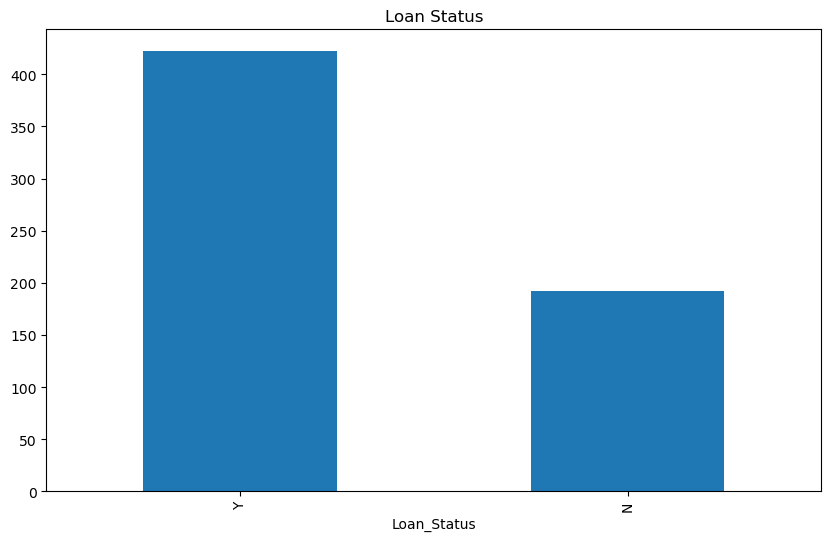

In [144]:
train_original['Loan_Status'].value_counts().plot.bar(figsize=(10,6), title='Loan Status')

# The loan of 422(around 69%) people out of 614 was approved.

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

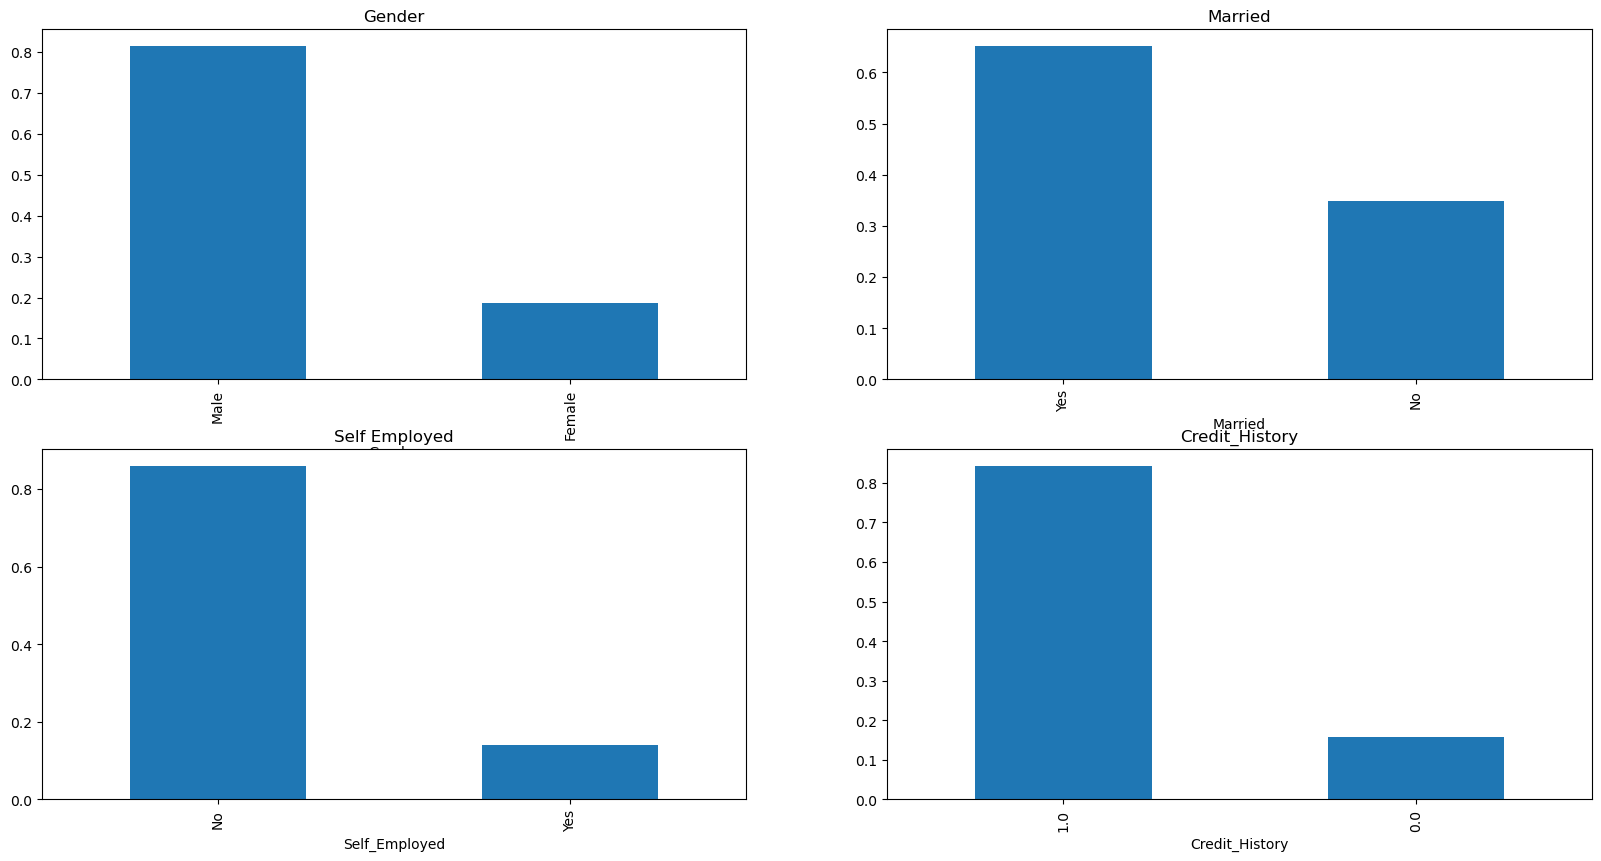

In [88]:
plt.figure(1)
plt.subplot(221)
train_original['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train_original['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train_original['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')
plt.subplot(224)
train_original['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

<Axes: title={'center': 'Property Area'}, xlabel='Property_Area'>

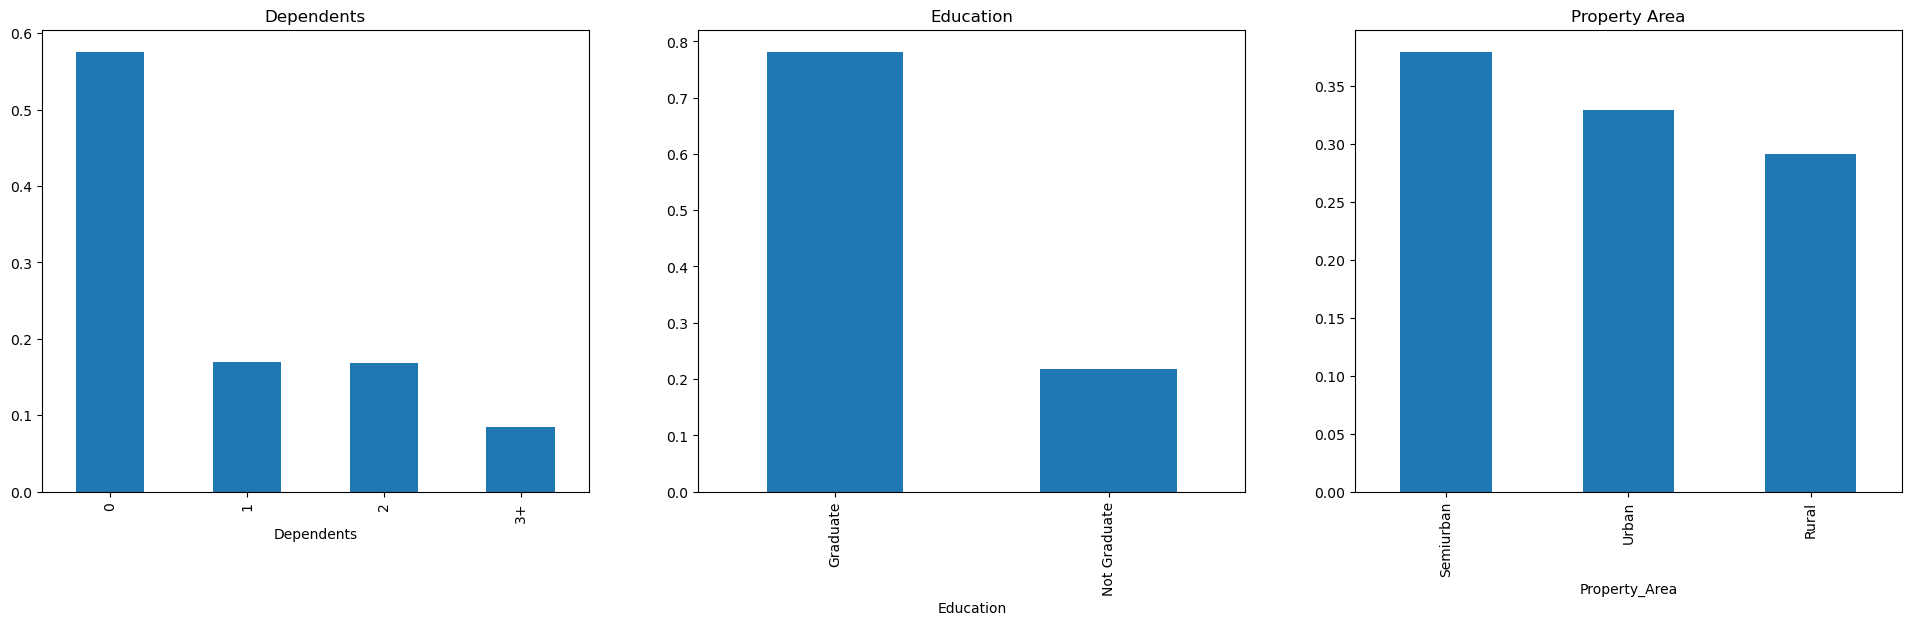

In [89]:
plt.figure(1)
plt.subplot(131)
train_original['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train_original['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train_original['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.

<Axes: >

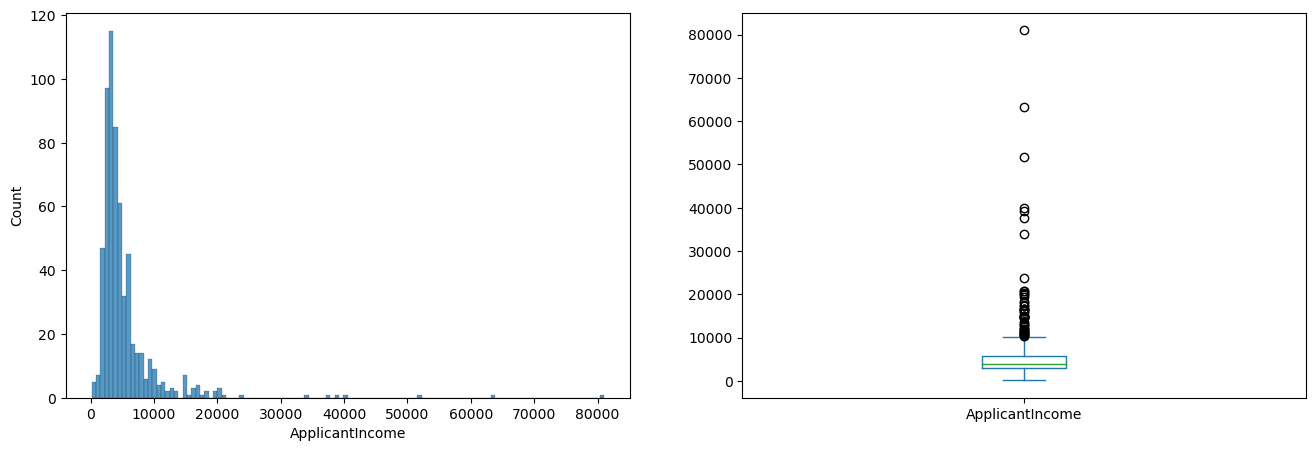

In [90]:
plt.figure(1)
plt.subplot(121)
sns.histplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

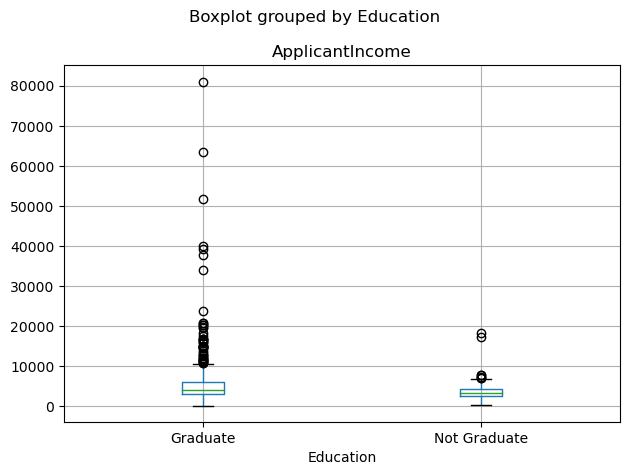

In [91]:
train_original.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

### There are higher number of graduates with very high incomes which are appearing to be outliers. But overall graduated applicants have higher income

In [92]:
# ploting using plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
fig_income_box_education = px.box(train_original,x='Education',y='ApplicantIncome',title='Box Plot of Applicant Income')
fig_income_box_education.show()

In [93]:
fig_income_box_married = px.box(train_original,x='Married',y='ApplicantIncome',title='Box Plot of Applicant Income')
fig_income_box_married.show()

In [94]:
fig_income_box_gender = px.box(train_original,x='Gender',y='ApplicantIncome',title='Box Plot of Applicant Income')
fig_income_box_gender.show()

In [95]:
fig_income_box_loan_status = px.box(train_original,x='Loan_Status',y='ApplicantIncome',title='Box Plot of Applicant Income')
fig_income_box_loan_status.show()

In [96]:
fig_income_box_Property_Area = px.box(train_original,x='Property_Area',y='ApplicantIncome',title='Box Plot of Applicant Income')
fig_income_box_Property_Area.show()

In [97]:
fig_income_box_self_employed = px.box(train_original,x='Self_Employed',y='ApplicantIncome',title='Box Plot of Applicant Income')
fig_income_box_self_employed.show()

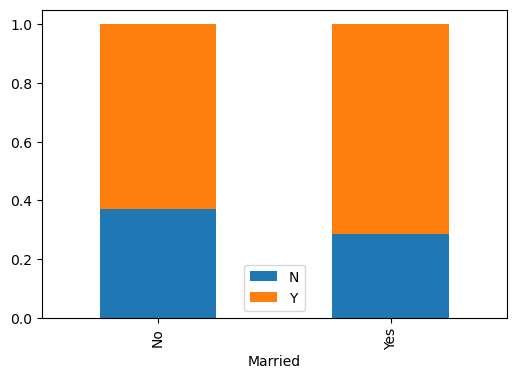

In [98]:
Married = pd.crosstab(train_original['Married'], train_original['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

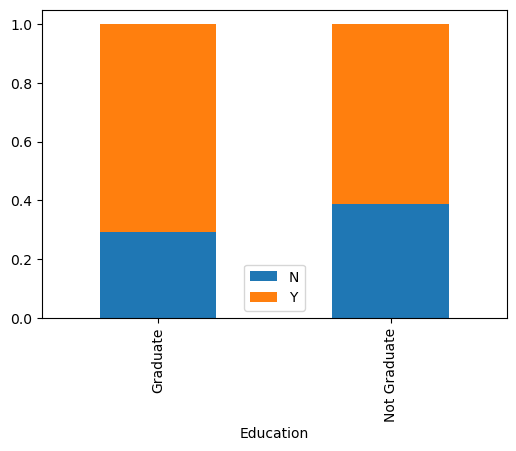

In [99]:
Education = pd.crosstab(train_original['Education'], train_original['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

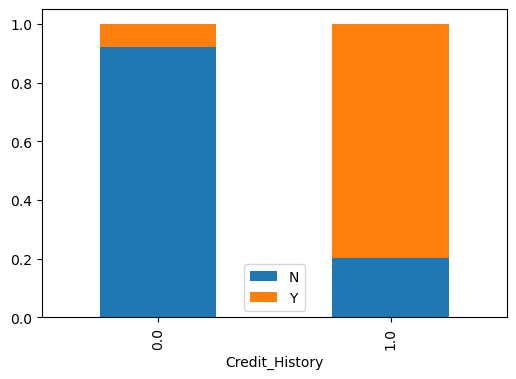

In [100]:
Credit_History = pd.crosstab(train_original['Credit_History'], train_original['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

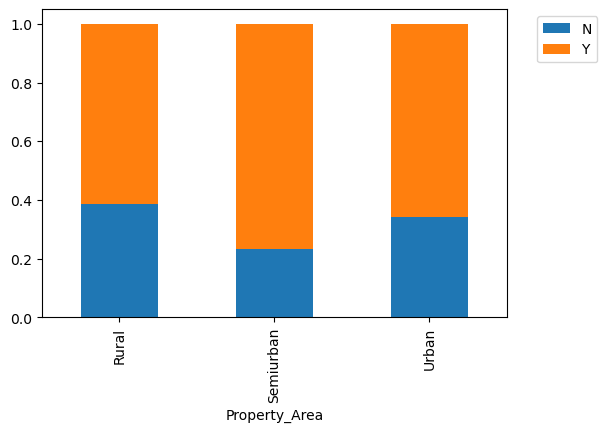

In [101]:
Property_Area = pd.crosstab(train_original['Property_Area'], train_original['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

- Proportion of married applicants is higher for the approved loans.
- Graduated Applicants has higher ratio to get a loan
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

In [102]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
train

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_bin
0,1.0,0.0,0.0,0.0,5849.0,0.0,138.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5849.0,High
1,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6091.0,Very High
2,1.0,1.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3000.0,Average
3,1.0,1.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4941.0,High
4,1.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2900.0,Average
610,1.0,1.0,3.0,0.0,4106.0,0.0,40.0,180.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4106.0,High
611,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,8312.0,Very High
612,1.0,1.0,2.0,0.0,7583.0,0.0,187.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,7583.0,Very High


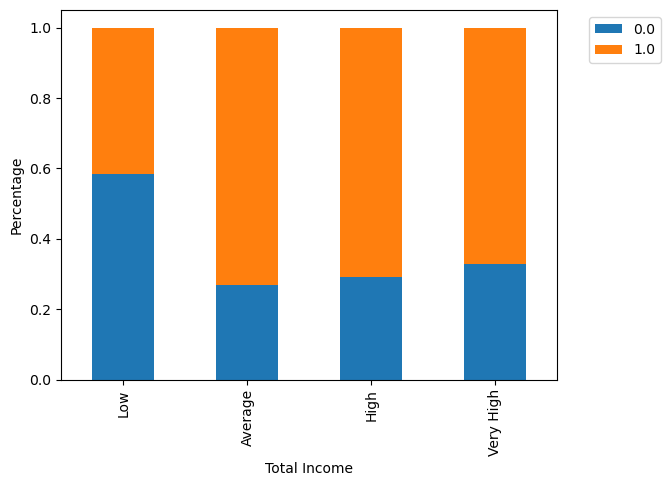

In [103]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

### Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

In [104]:
# using plotly to draw stripplot
strip = px.strip(
    train_original,
    x='Loan_Status',
    y='ApplicantIncome',
    color='Education',
    title='Strip Plot of Applicant Income by loan Status',
    labels={'Loan_Status':'Loan Status','ApplicantIncome':'Applicant Income'},
    hover_data=['Gender','Education']
)

strip.show()

d:\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



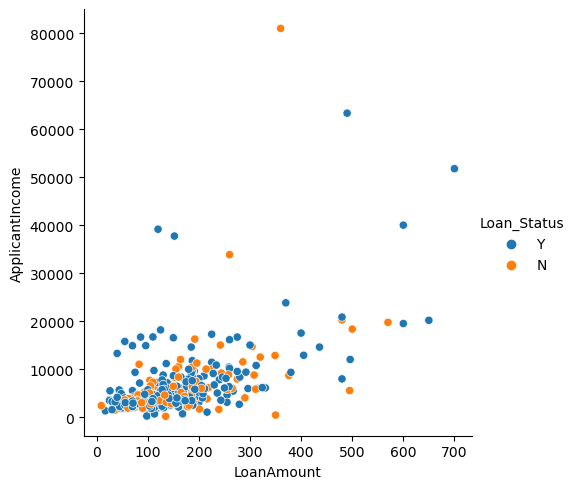

In [105]:
sns.relplot(data=train_original, x="LoanAmount", y="ApplicantIncome", hue="Loan_Status")
plt.show()

In [106]:
train = train.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [107]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Education_Graduate', 'Education_Not Graduate',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [108]:
# train['Dependents'].replace('3+', 3, inplace=True)
# predict['Dependents'].replace('3+', 3, inplace=True)
# train['Loan_Status'].replace('N', 0, inplace=True)
# train['Loan_Status'].replace('Y', 1, inplace=True)

<Axes: >

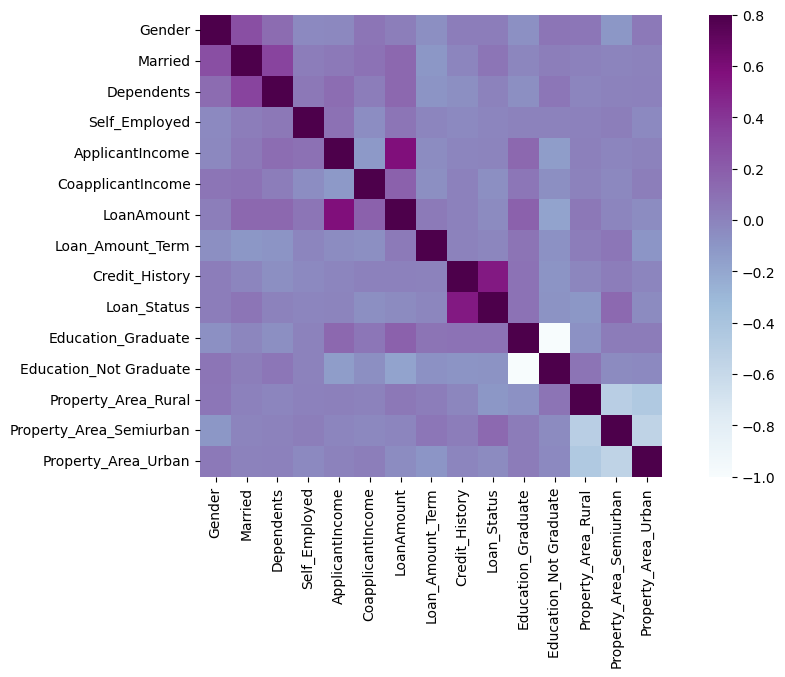

In [109]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), vmax=0.8, square=True, cmap='BuPu')

### We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.
### Also Graduated is correlated with loan amount, semiurban is correlated with loan status.

# Data Cleaning¶

In [110]:
train.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Education_Graduate         0
Education_Not Graduate     0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [111]:
# We impute missing values with mean, mode, median.
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [112]:
train.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Education_Graduate         0
Education_Not Graduate     0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [113]:
predict.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Education_Graduate         0
Education_Not Graduate     0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [114]:
predict['Gender'].fillna(predict['Gender'].mode()[0], inplace=True)
predict['Married'].fillna(predict['Married'].mode()[0], inplace=True)
predict['Dependents'].fillna(predict['Dependents'].mode()[0], inplace=True)
predict['Self_Employed'].fillna(predict['Self_Employed'].mode()[0], inplace=True)
predict['Credit_History'].fillna(predict['Credit_History'].mode()[0], inplace=True)
predict['Loan_Amount_Term'].fillna(predict['Loan_Amount_Term'].mode()[0], inplace=True)
predict['LoanAmount'].fillna(predict['LoanAmount'].median(), inplace=True)

In [115]:
predict.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Education_Graduate         0
Education_Not Graduate     0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

# Model Building

In [145]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

# one hot encoding

In [146]:
# X = pd.get_dummies(X)
# train = pd.get_dummies(train)
# predict = pd.get_dummies(predict)

In [147]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model1: Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [158]:
model = DecisionTreeClassifier(random_state=1)

param_grid = {
    'criterion':['gini','entropy'],
    'splitter': ['best', 'random'],
    'max_depth':[None,5,10,15,20,25,30,35,40,45,50,55],
    'min_samples_split':[2,5,7,10,12,15,17,20,23,25],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12]
}
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
print(f"Best Parameters are:{best_params}.")
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

best_dtree.feature_importances_

imp_df=pd.DataFrame({
    "Varname":X_train.columns,
    "Imp":best_dtree.feature_importances_
})
imp_df.sort_values(by="Imp",ascending=False)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
Best Parameters are:{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 23, 'splitter': 'random'}.
              precision    recall  f1-score   support

         0.0       0.78      0.50      0.61        50
         1.0       0.84      0.95      0.89       135

    accuracy                           0.83       185
   macro avg       0.81      0.72      0.75       185
weighted avg       0.82      0.83      0.81       185

0.827027027027027


,Varname,Imp
8,Credit_History,0.716546
6,LoanAmount,0.099594
11,Property_Area_Rural,0.050889
2,Dependents,0.050180
1,Married,0.028872
12,Property_Area_Semiurban,0.019498
4,ApplicantIncome,0.016574
9,Education_Graduate,0.011790
3,Self_Employed,0.004403
10,Education_Not Graduate,0.001653


# Model2: Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
param_grid_rf = {
    'n_estimators':[450,500,550,600,650],
    'max_depth':[None,5,10,20,30,40,50],
    'min_samples_split':[2,5,10,15,20,25]
}

In [161]:
rfmodel = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
rfmodel.fit(X_train,y_train)

best_params = rfmodel.best_params_
print("Best parameters found: ", best_params)

best_rf = rfmodel.best_estimator_
y_pred = best_rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

best_rf.feature_importances_

imp_df=pd.DataFrame({
    "Varname":X_train.columns,
    "Imp":best_rf.feature_importances_
})
imp_df.sort_values(by="Imp",ascending=False)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best parameters found:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 550}
0.8432432432432433
              precision    recall  f1-score   support

         0.0       0.89      0.48      0.62        50
         1.0       0.84      0.98      0.90       135

    accuracy                           0.84       185
   macro avg       0.86      0.73      0.76       185
weighted avg       0.85      0.84      0.83       185



,Varname,Imp
8,Credit_History,0.496848
6,LoanAmount,0.106536
4,ApplicantIncome,0.102775
5,CoapplicantIncome,0.083226
7,Loan_Amount_Term,0.044755
2,Dependents,0.032775
12,Property_Area_Semiurban,0.026054
11,Property_Area_Rural,0.024273
1,Married,0.019048
3,Self_Employed,0.016259


# Model3:Logistic

In [172]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
param_grid_log = [
    {
        'penalty': ['l2', 'none'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
        'solver': ['lbfgs', 'newton-cg', 'sag']
    },
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
        'solver': ['liblinear']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
        'solver': ['saga'],
        'l1_ratio': [0, 0.5, 1]
    }
]

In [173]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid_log, cv=5, n_jobs=-1, verbose=2,scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best estimator
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

coefficients = best_logreg.coef_[0]
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

importance_df.reset_index(drop=True, inplace=True)
importance_df


Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best parameters found:  {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
Accuracy:  0.8162162162162162
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.46      0.57        50
         1.0       0.83      0.95      0.88       135

    accuracy                           0.82       185
   macro avg       0.80      0.70      0.73       185
weighted avg       0.81      0.82      0.80       185



d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



,Feature,Coefficient
0,Credit_History,3.838976
1,Married,0.603229
2,Property_Area_Semiurban,0.192322
3,ApplicantIncome,0.000011
4,CoapplicantIncome,-0.000044
5,Loan_Amount_Term,-0.001945
6,LoanAmount,-0.002936
7,Dependents,-0.003659
8,Self_Employed,-0.071167
9,Gender,-0.200086


# Model4: KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.inspection import permutation_importance

knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': np.arange(1,31,2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

result = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame as a table
importance_df.reset_index(drop=True, inplace=True)
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Accuracy:  0.7081081081081081
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.41      0.18      0.25        50
         1.0       0.75      0.90      0.82       135

    accuracy                           0.71       185
   macro avg       0.58      0.54      0.53       185
weighted avg       0.66      0.71      0.67       185

                    Feature  Importance
0         CoapplicantIncome    0.039459
1           ApplicantIncome    0.023784
2                LoanAmount    0.005405
3                    Gender    0.000000
4                   Married    0.000000
5                Dependents    0.000000
6             Self_Employed    0.000000
7            Credit_History    0.000000
8        Education_Graduate    0.000000
9    Education_Not Graduate    0.000000
10      Property_Area_Rural

# Model5: XGBOOST

In [178]:
from xgboost import XGBClassifier
# Define the model
xgb = XGBClassifier(eval_metric='logloss')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Perform the grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=2, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best estimator
best_xgb = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

best_xgb.feature_importances_

imp_df=pd.DataFrame({
    "Varname":X_train.columns,
    "Imp":best_xgb.feature_importances_
})
imp_df.sort_values(by="Imp",ascending=False)



Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Accuracy:  0.8324324324324325
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.46      0.60        50
         1.0       0.83      0.97      0.89       135

    accuracy                           0.83       185
   macro avg       0.84      0.72      0.75       185
weighted avg       0.84      0.83      0.81       185



,Varname,Imp
8,Credit_History,0.335284
11,Property_Area_Rural,0.093510
12,Property_Area_Semiurban,0.067693
1,Married,0.066178
4,ApplicantIncome,0.059505
5,CoapplicantIncome,0.057481
6,LoanAmount,0.056660
9,Education_Graduate,0.055009
7,Loan_Amount_Term,0.054944
3,Self_Employed,0.047608


# Model6: GBM

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gbm = GradientBoostingClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform the grid search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best estimator
best_gbm = grid_search.best_estimator_


# Predict on the test set
y_pred = best_gbm.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

best_gbm.feature_importances_

imp_df=pd.DataFrame({
    "Varname":X_train.columns,
    "Imp":best_gbm.feature_importances_
})
imp_df.sort_values(by="Imp",ascending=False)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Accuracy:  0.8054054054054054
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.71      0.48      0.57        50
         1.0       0.83      0.93      0.87       135

    accuracy                           0.81       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.79      0.81      0.79       185



,Varname,Imp
8,Credit_History,0.315246
4,ApplicantIncome,0.180541
6,LoanAmount,0.170175
5,CoapplicantIncome,0.125757
7,Loan_Amount_Term,0.048130
2,Dependents,0.033087
3,Self_Employed,0.024441
11,Property_Area_Rural,0.024269
1,Married,0.022013
0,Gender,0.018318


# Model7: SVM

In [182]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svm = SVC()

param_grid = {
    'C': [0.1, 100],
    'gamma': [1, 0.001],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_svm = grid_search.best_estimator_


y_pred = best_svm.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy:  0.8378378378378378
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.46      0.61        50
         1.0       0.83      0.98      0.90       135

    accuracy                           0.84       185
   macro avg       0.86      0.72      0.75       185
weighted avg       0.84      0.84      0.82       185



# bonus

# 1) missing value -> imputation 0 knn / regression 2) eda 3) drop 1 col 4) model selection - logistic/knn/ rf / dt / xgboost  / nn / gbm / svm 5) grid search -> hyparameter tuning 6) feature importance

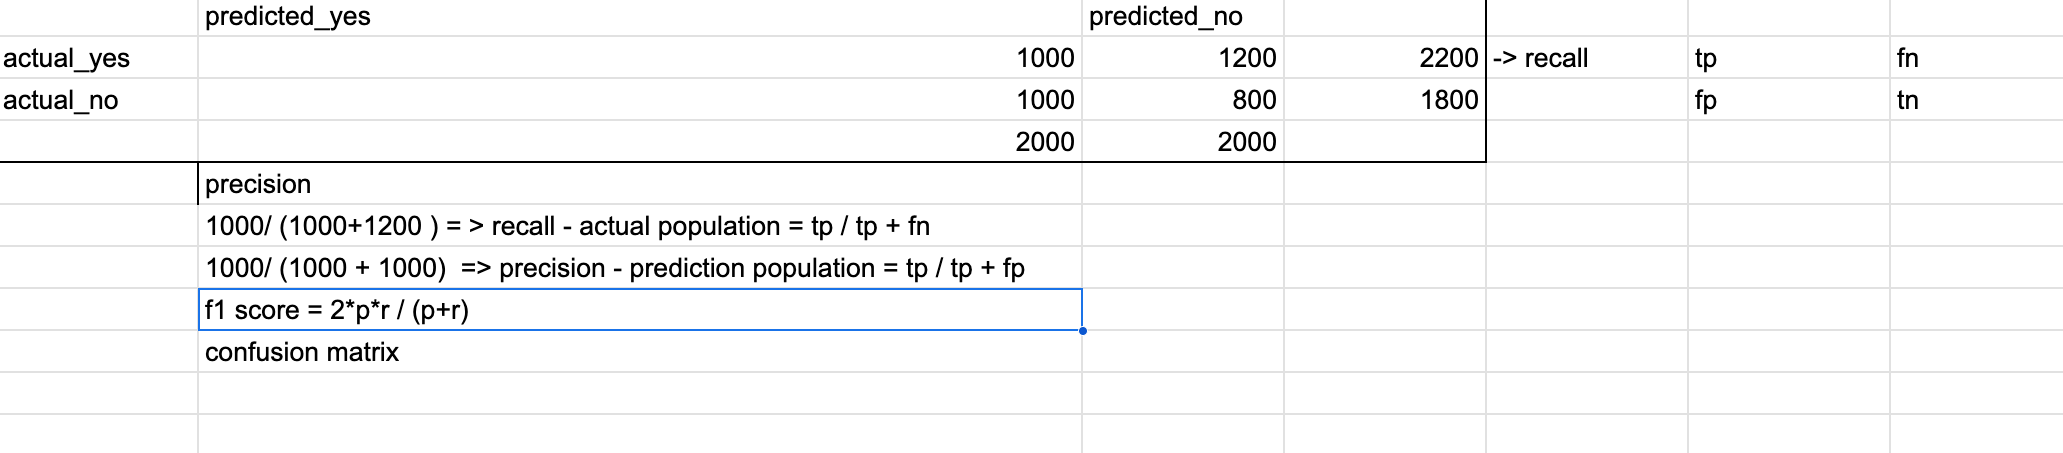